In [1]:
""" Imports """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks, peak_prominences, peak_widths
import sys

In [ ]:
""" 
Pass Data in an argument when the file is run
    - This does not work in jupyter 
    - A test file shows this function
"""
ltoutputch1 = str(sys.argv[1]) # sys.argv[0] is the python file
ltoutputch4 = str(sys.argv[2])

ch1data = pd.read_csv(ltoutputch1, sep="\t")
ch4data = pd.read_csv(ltoutputch4, sep="\t")

ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

In [2]:
""" Pull Data Manually """
ch1data = pd.read_csv("LtoutputFiles/output5ch1_05_03_2023.txt", sep="\t")
ch4data = pd.read_csv("LtoutputFiles/output5ch4_05_03_2023.txt", sep="\t")

ch1data.columns =["Time", "V(compout)-CH1"]
ch4data.columns =["Time", "V(compout)-CH4"]

In [3]:
""" Formatting """

# Create data frame 
ch1 = pd.DataFrame(ch1data)
ch4 = pd.DataFrame(ch4data)

# Check for shorter file and truncate 

# print(f"len ch1: {len(ch1)}\nlen ch4: {len(ch4)}")
if len(ch1) < len(ch4): 
    ch1 = ch1.truncate(after=len(ch1)-1) # smallest less 1 bc `after` adds a value
    ch4 = ch4.truncate(after=len(ch1)-1)
else: 
    ch1 = ch1.truncate(after=len(ch4)-1)
    ch4 = ch4.truncate(after=len(ch4)-1)
# print(f"\nTruncation:\nlen ch1: {len(ch1)}\nlen ch4: {len(ch4)}")

# Naming and floats
ch1t = ch1["Time"].to_numpy()
ch4t = ch4["Time"].to_numpy()
ch1V = ch1["V(compout)-CH1"].to_numpy()
ch4V = ch4["V(compout)-CH4"].to_numpy()

Peak indices
ch1: [  76  391  749 1078 1412]
ch4: [ 148  481  802 1126 1434]


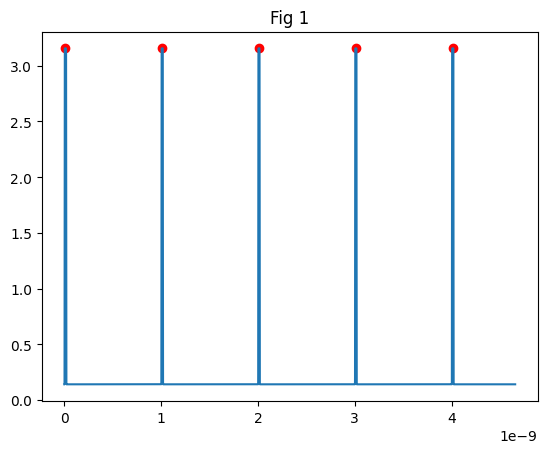

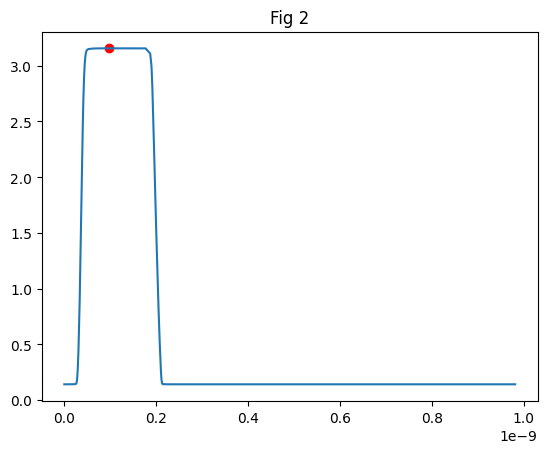

In [16]:
""" 
Find Rising edge: Testing block
    - Threshold voltage: 1.6V 
"""

# View all peaks 
peakindexCH1, _ = find_peaks(ch1V, height =1.6)
peakindexCH4, _ = find_peaks(ch4V, height= 1.6)
peaksCH1 = ch1V[peakindexCH1]
peaksCH4 = ch4V[peakindexCH4]

print(f'Peak indices\nch1: {peakindexCH1}\nch4: {peakindexCH4}')

plt.figure(0)
plt.plot(ch1t*0.001,ch1V) # nano
plt.scatter(ch1t[peakindexCH1]*0.001,peaksCH1,  marker='o', color='red')
plt.title("Fig 1")

# View one peak
ch1peak = ch1.truncate(after=peakindexCH1[0]+100) # smallest less 1 bc `after` adds a value
ch4peak = ch4.truncate(after=peakindexCH4[0]+100)

# Naming and floats
ch1tpeak = ch1peak["Time"].to_numpy()
ch4tpeak = ch4peak["Time"].to_numpy()
ch1Vpeak = ch1peak["V(compout)-CH1"].to_numpy()
ch4Vpeak = ch4peak["V(compout)-CH4"].to_numpy()

plt.figure(1)
plt.title("Fig 2")
plt.plot(ch1tpeak*0.01,ch1Vpeak)
plt.scatter(ch1t[peakindexCH1[0]]*0.01,peaksCH1[0],  marker='o', color='red')

In [45]:
slopech1 = np.diff(ch1V)/np.diff(ch1t)

# Maybe a slope checker ? 

# print(len(slope))
# print(len(ch1V))
# print(len(ch1t))

delta = .5 # Volts
v_rise = 1.5 # Volts
n = 0 

for (m, i) in zip(slopech1, ch1V): 
    if m > 0 and ( v_rise - delta ) <= i <= (v_rise + delta): 
        print(f'\nSlope is positive:{m>0}\nVoltage: {i}')
    else: 
        continue


Slope is positive:True
Voltage: 1.657259

Slope is positive:True
Voltage: 1.035502

Slope is positive:True
Voltage: 1.114004

Slope is positive:True
Voltage: 1.956406

Slope is positive:True
Voltage: 1.589885

Slope is positive:True
Voltage: 1.334314
